# Matin Ghorbani 6.2.Assignment
---

## Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from knn_finding_nemo_dory import KNN

### Preprocessing on image

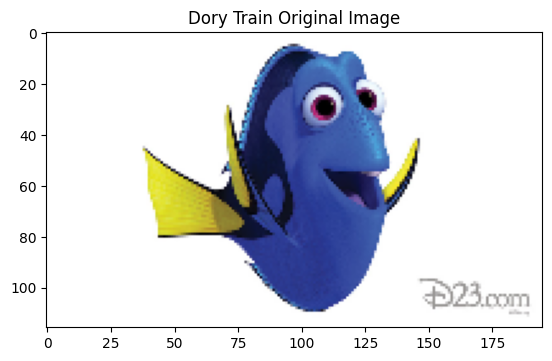

In [33]:
dory_train = cv.imread('resources/dory_train.jpg')
dory_train = cv.resize(dory_train, (0, 0), None, .25, .25)
dory_train_rgb = cv.cvtColor(dory_train, cv.COLOR_BGR2RGB)
dory_train_hsv = cv.cvtColor(dory_train, cv.COLOR_BGR2HSV)

pixels_list_hsv = dory_train_hsv.reshape(-1, 3)

plt.imshow(dory_train_rgb)
plt.title('Dory Train Original Image')
plt.show()

## Blue Mask

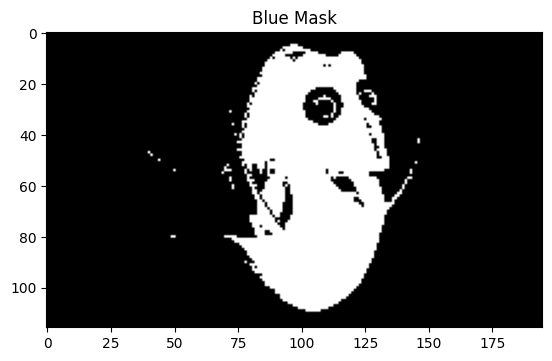

In [34]:
light_blue = (0, 0, 50)
dark_blue = (105, 155, 255)

blue_mask = cv.inRange(dory_train_rgb, light_blue, dark_blue)

plt.imshow(blue_mask, 'gray')
plt.title('Blue Mask')
plt.show()

## Yellow Mask

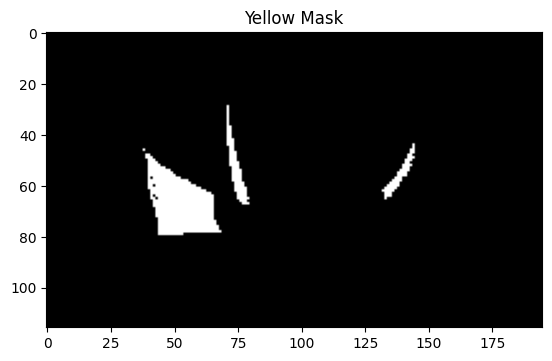

In [35]:
light_yellow = (150, 130, 30)
dark_yellow = (255, 255, 95)
yellow_mask = cv.inRange(dory_train_rgb, light_yellow, dark_yellow)

plt.imshow(yellow_mask, 'gray')
plt.title('Yellow Mask')
plt.show()

## Final Mask

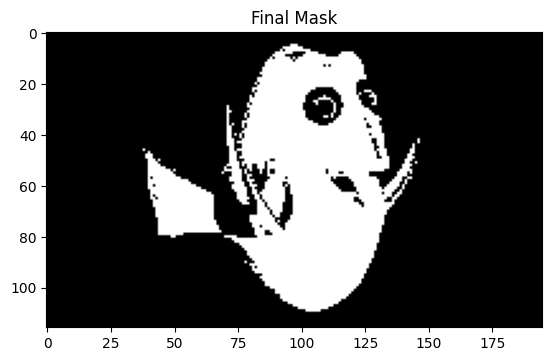

In [36]:
final_mask = blue_mask + yellow_mask
plt.imshow(final_mask, 'gray')
plt.title('Final Mask')
plt.show()

## Result of train image

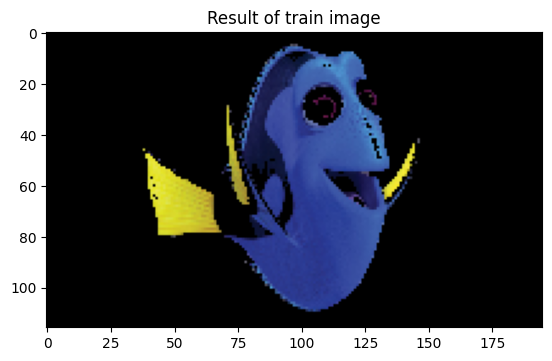

In [37]:
result = cv.bitwise_and(dory_train_rgb, dory_train_rgb, mask=final_mask)
plt.imshow(result)
plt.title('Result of train image')
plt.show()

## Fit our KNN on the train dataset.

In [38]:
x_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1,) // 255

In [39]:
knn = KNN(3)
knn.fit(x_train, y_train)

## Predict dory pixels and background pixels for new test images.

### Preprocessing on new dory image

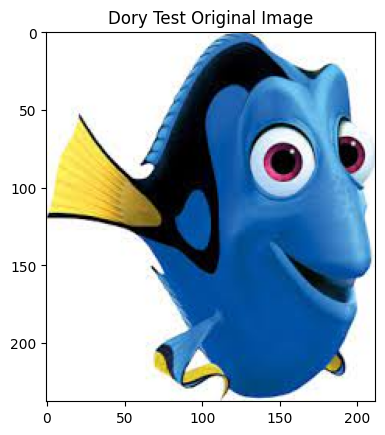

In [45]:
dory_test = cv.imread('resources/dory_test.jpeg')
dory_test_rgb = cv.cvtColor(dory_test, cv.COLOR_BGR2RGB)
dory_test_hsv = cv.cvtColor(dory_test, cv.COLOR_BGR2HSV)

plt.imshow(dory_test_rgb)
plt.title('Dory Test Original Image')
plt.show()

In [46]:
x_test = dory_test_hsv.reshape(-1, 3) / 255
y_pred = knn.predict(x_test)

## Final Result

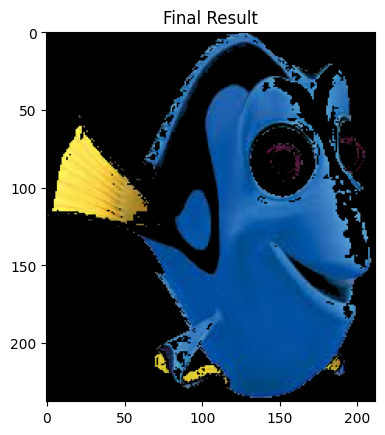

In [47]:
result = np.array(y_pred).reshape(dory_test.shape[:2])
result = result.astype('uint8')

final_result = cv.bitwise_and(dory_test, dory_test, mask=result)
final_result = cv.cvtColor(final_result, cv.COLOR_BGR2RGB)
plt.imshow(final_result)
plt.title('Final Result')
plt.show()